In [1]:
import tensorflow as tf
import os
tf.config.list_physical_devices('GPU')
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'
print(os.getenv('TF_GPU_ALLOCATOR'))

# testing if gpu is used

if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

cuda_malloc_async
Default GPU Device:/device:GPU:0


In [3]:
from PIL import Image
import PIL
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
import warnings
from imblearn.under_sampling import RandomUnderSampler 
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from tensorflow.keras.utils import plot_model
import pydot
import graphviz

In [4]:
# set seed
np.random.seed(0)

# reading data into dataframe
afhq = pd.read_csv("afhq/metadata.csv")
afhq['image_path'] = 'afhq/' + afhq['image_path']
biggan = pd.read_csv("big_gan/metadata.csv")
biggan['image_path'] = 'big_gan/' + biggan['image_path']
celebahq = pd.read_csv("celebahq/metadata.csv")
celebahq['image_path'] = 'celebahq/' + celebahq['image_path']
cips = pd.read_csv("cips/metadata.csv")
cips['image_path'] = 'cips/' + cips['image_path']
coco = pd.read_csv("coco/metadata.csv")
coco['image_path'] = 'coco/' + coco['image_path']
cycle_gan = pd.read_csv("cycle_gan/metadata.csv")
cycle_gan['image_path'] = 'cycle_gan/' + cycle_gan['image_path']
ddpm = pd.read_csv("ddpm/metadata.csv")
ddpm['image_path'] = 'ddpm/' + ddpm['image_path']
denoising_diffusion_gan = pd.read_csv("denoising_diffusion_gan/metadata.csv")
denoising_diffusion_gan['image_path'] = 'denoising_diffusion_gan/' + denoising_diffusion_gan['image_path']
diffusion_gan = pd.read_csv("diffusion_gan/metadata.csv")
diffusion_gan['image_path'] = 'diffusion_gan/' + diffusion_gan['image_path']
face_synthetics = pd.read_csv("face_synthetics/metadata.csv")
face_synthetics['image_path'] = 'face_synthetics/' + face_synthetics['image_path']
ffhq = pd.read_csv("ffhq/metadata.csv")
ffhq['image_path'] = 'ffhq/' + ffhq['image_path']
gansformer = pd.read_csv("gansformer/metadata.csv")
gansformer['image_path'] = 'gansformer/' + gansformer['image_path']
gau_gan = pd.read_csv("gau_gan/metadata.csv")
gau_gan['image_path'] = 'gau_gan/' + gau_gan['image_path']
generative_inpainting = pd.read_csv("generative_inpainting/metadata.csv")
generative_inpainting['image_path'] = 'generative_inpainting/' + generative_inpainting['image_path']
glide = pd.read_csv("glide/metadata.csv")
glide['image_path'] = 'glide/' + glide['image_path']
lama = pd.read_csv("lama/metadata.csv")
lama['image_path'] = 'lama/' + lama['image_path']
imagenet = pd.read_csv("imagenet/metadata.csv")
imagenet['image_path'] = 'imagenet/' + imagenet['image_path']
landscape = pd.read_csv("landscape/metadata.csv")
landscape['image_path'] = 'landscape/' + landscape['image_path']
latent_diffusion = pd.read_csv("latent_diffusion/metadata.csv")
latent_diffusion['image_path'] = 'latent_diffusion/' + latent_diffusion['image_path']
lsun = pd.read_csv("lsun/metadata.csv")
lsun['image_path'] = 'lsun/' + lsun['image_path']
mat = pd.read_csv("mat/metadata.csv")
mat['image_path'] = 'mat/' + mat['image_path']
metfaces = pd.read_csv("metfaces/metadata.csv")
metfaces['image_path'] = 'metfaces/' + metfaces['image_path']
palette = pd.read_csv("palette/metadata.csv")
palette['image_path'] = 'palette/' + palette['image_path']
pro_gan = pd.read_csv("pro_gan/metadata.csv")
pro_gan['image_path'] = 'pro_gan/' + pro_gan['image_path']
projected_gan = pd.read_csv("projected_gan/metadata.csv")
projected_gan['image_path'] = 'projected_gan/' + projected_gan['image_path']
sfhq = pd.read_csv("sfhq/metadata.csv")
sfhq['image_path'] = 'sfhq/' + sfhq['image_path']
stable_diffusion = pd.read_csv("stable_diffusion/metadata.csv")
stable_diffusion['image_path'] = 'stable_diffusion/' + stable_diffusion['image_path']
star_gan = pd.read_csv("star_gan/metadata.csv")
star_gan['image_path'] = 'star_gan/' + star_gan['image_path']
stylegan1 = pd.read_csv("stylegan1/metadata.csv")
stylegan1['image_path'] = 'stylegan1/' + stylegan1['image_path']
stylegan2 = pd.read_csv("stylegan2/metadata.csv")
stylegan2['image_path'] = 'stylegan2/' + stylegan2['image_path']
stylegan3 = pd.read_csv("stylegan3/metadata.csv")
stylegan3['image_path'] = 'stylegan3/' + stylegan3['image_path']
taming_transformer = pd.read_csv("taming_transformer/metadata.csv")
taming_transformer['image_path'] = 'taming_transformer/' + taming_transformer['image_path']
vq_diffusion = pd.read_csv("vq_diffusion/metadata.csv")
vq_diffusion['image_path'] = 'vq_diffusion/' + vq_diffusion['image_path']

metadata = pd.concat([afhq, biggan, celebahq, cips, cycle_gan, ddpm, coco, denoising_diffusion_gan, 
                      diffusion_gan, face_synthetics, ffhq, gansformer, gau_gan, generative_inpainting, glide, lama,
                      imagenet, landscape, latent_diffusion, lsun, mat, metfaces, palette, pro_gan, projected_gan, 
                      sfhq, stable_diffusion, star_gan, stylegan1, stylegan2, stylegan3, taming_transformer, vq_diffusion], ignore_index=True)

# change target from non-zeros to 1
def change_target(x):
    if (x != 0):
        return 1
    return x

metadata['target'] = metadata['target'].apply(lambda x: change_target(x))
metadata.tail()

,filename,image_path,target,category
2496733,img009997.jpg,vq_diffusion/vqdiff-imgnet/999/img009997.jpg,1,999
2496734,img009995.jpg,vq_diffusion/vqdiff-imgnet/999/img009995.jpg,1,999
2496735,img009999.jpg,vq_diffusion/vqdiff-imgnet/999/img009999.jpg,1,999
2496736,img009992.jpg,vq_diffusion/vqdiff-imgnet/999/img009992.jpg,1,999
2496737,img009998.jpg,vq_diffusion/vqdiff-imgnet/999/img009998.jpg,1,999


In [5]:
min_count = metadata['target'].value_counts().min()
print(metadata['target'].value_counts())
metadata = metadata.groupby('target').apply(lambda x: x.sample(min_count, replace=False))
metadata = metadata.reset_index(drop=True)
print(metadata['target'].value_counts())

target
1    1531749
0     964989
Name: count, dtype: int64
target
0    964989
1    964989
Name: count, dtype: int64


1


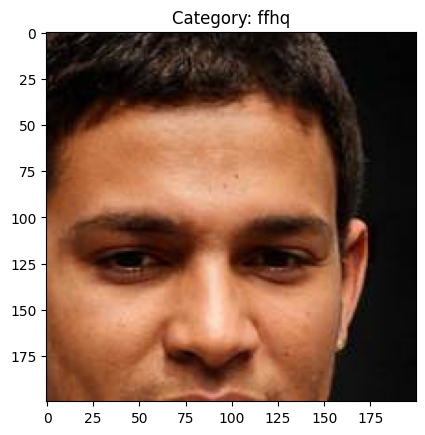

1


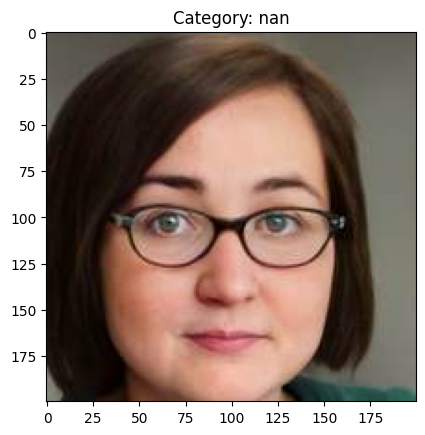

1


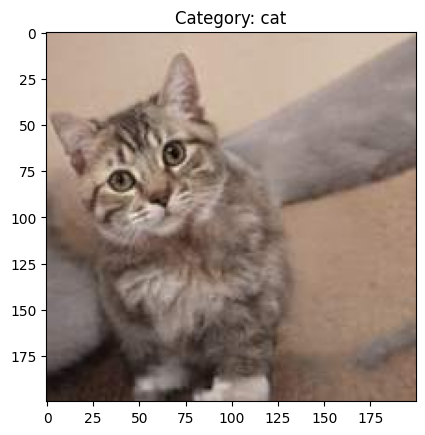

In [6]:
# show some images
for index, row in metadata.tail(3).iterrows():
    print(row['target'])
    category = row['category']
    image_path = row['image_path']
    image = Image.open(image_path)
    image.resize((224, 224))
    plt.imshow(image)
    plt.title(f"Category: {category}")
    plt.show()

In [30]:
# load and pre-process images
def load_and_preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((224, 224))  # Resize the image to a fixed size
    image = np.array(image)  # Convert the image to a numpy array
    image = image.astype('float32') / 255.0  # Normalize pixel values between 0 and 1
    return image

# create mini-batches
def batch_generator(df, batch_size):
    num_samples = df.shape[0]
    num_batches = num_samples // batch_size

    while True:
        df = df.sample(frac=1).reset_index(drop=True)  # Shuffle the dataframe
        
        for batch_index in range(num_batches):
            batch_df = df[batch_index * batch_size : (batch_index + 1) * batch_size]
            images = []
            labels = []

            for _, row in batch_df.iterrows():
                image_path = row['image_path']
                image = load_and_preprocess_image(image_path)
                images.append(image)

                label = row['target']
                labels.append(label)

            yield np.array(images), np.array(labels)

# # one-hot encoding for y
metadata['target'] = metadata['target'].astype('category')
        
# resampling
train_df, test_df = train_test_split(metadata, test_size=0.2, random_state=42)

print(train_df['target'])

731519     0
1004437    1
197789     0
1714334    1
659872     0
          ..
259178     0
1414414    1
131932     0
671155     0
121958     0
Name: target, Length: 1543982, dtype: category
Categories (2, int64): [0, 1]


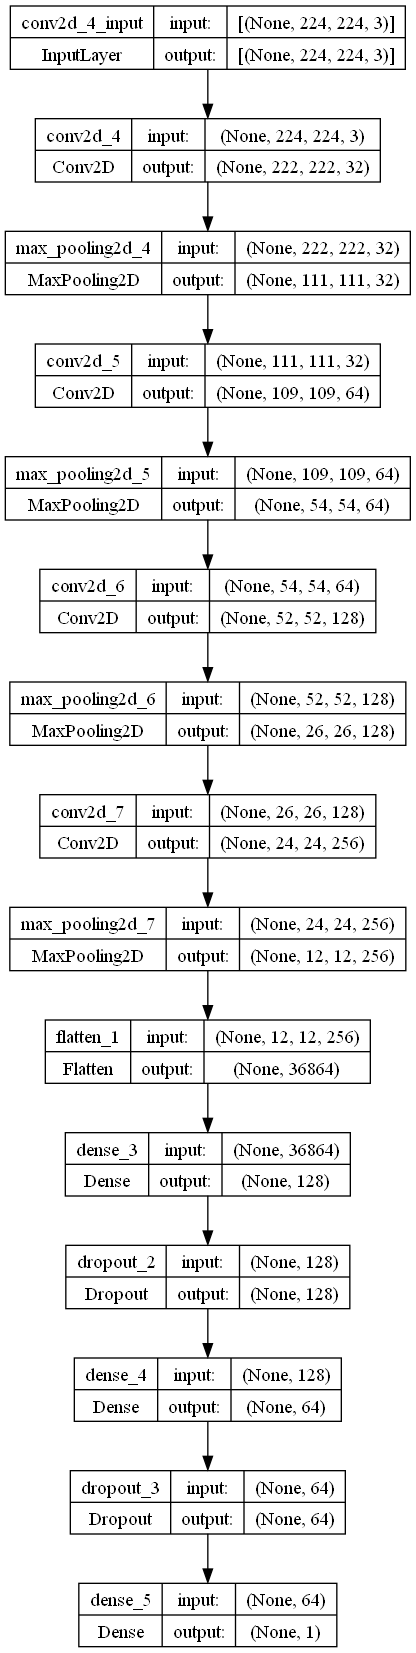

In [31]:
# building cnn!
model = Sequential()

# convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# flatten layer
model.add(Flatten())

# fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(1, activation='sigmoid'))

# compile for output
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# plotting graph
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True, expand_nested=True)

In [32]:
# model training!
batch_size = 32
train_generator = batch_generator(train_df, batch_size)

num_train_samples = train_df.shape[0]
steps_per_epoch = num_train_samples // batch_size

model.fit(train_generator, epochs=10, steps_per_epoch=steps_per_epoch)

Epoch 1/10
 2079/48249 [>.............................] - ETA: 17:41:58 - loss: 0.6934 - accuracy: 0.4984

KeyboardInterrupt: 

In [35]:
import psutil
psutil.virtual_memory().available/(1024.**3)

5.627532958984375

In [11]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [12]:
# show model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [14]:
# model evaluation

test_images = []
test_labels = []

for _, row in test_df.iterrows():
    image_path = row['image_path']
    image = load_and_preprocess_image(image_path)
    test_images.append(image)

    label = row['target']
    test_labels.append(label)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

2023-08-06 03:35:22.209077: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 15705489408 exceeds 10% of free system memory.
2023-08-06 03:35:30.405666: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 15705489408 exceeds 10% of free system memory.


816/816 [==============================] - 10s 12ms/step - loss: 0.3084 - accuracy: 0.8691
Test Loss: 0.30842486023902893
Test Accuracy: 0.8691151738166809


In [15]:
# more model evals
test_generator = batch_generator(test_df, batch_size)

# Predict labels for test data
test_predictions = []
test_labels = []

num_test_samples = test_df.shape[0]
steps_per_epoch = num_test_samples // batch_size

for _ in range(steps_per_epoch):
    batch_images, batch_labels = next(test_generator)
    batch_predictions = model.predict(batch_images)
    
    test_predictions.extend(batch_predictions)
    test_labels.extend(batch_labels)

# Convert predictions and labels to numpy arrays
test_predictions = np.array(test_predictions)
test_labels = np.array(test_labels)


1/1 [==============================] - 0s 28ms/step


Accuracy: 0.86917
Precision: 0.87989
Recall: 0.85073
F1 Score: 0.86506


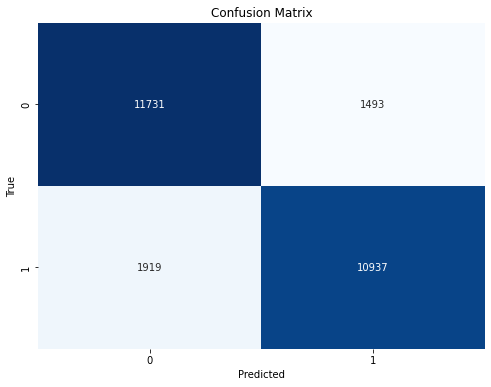

In [16]:
test_predictions = (test_predictions > 0.5).astype(int)

# other metrics
accuracy = accuracy_score(test_labels, test_predictions)
precision = precision_score(test_labels, test_predictions)
recall = recall_score(test_labels, test_predictions)
f1 = f1_score(test_labels, test_predictions)
cm = confusion_matrix(test_labels, test_predictions)

# printing outputs and confusion matrix
print("Accuracy:", round(accuracy, 5))
print("Precision:", round(precision, 5))
print("Recall:", round(recall, 5))
print("F1 Score:", round(f1, 5))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()